In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [11]:
# 加载数据
file_path = os.path.join('../data', 'tmall_order_report.csv')
data = pd.read_csv(file_path)

In [12]:
# 初始数据检查
print('数据前五行：')
print(data.head())
print('\n数据信息：')
print(data.info())

数据前五行：
   订单编号    总金额  买家实际支付金额   收货地址                订单创建时间              订单付款时间   \
0     1  178.8       0.0      上海  2020-02-21 00:00:00                  NaN   
1     2   21.0      21.0  内蒙古自治区  2020-02-20 23:59:54  2020-02-21 00:00:02   
2     3   37.0       0.0     安徽省  2020-02-20 23:59:35                  NaN   
3     4  157.0     157.0     湖南省  2020-02-20 23:58:34  2020-02-20 23:58:44   
4     5   64.8       0.0     江苏省  2020-02-20 23:57:04  2020-02-20 23:57:11   

   退款金额  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4  64.8  

数据信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28010 entries, 0 to 28009
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   订单编号      28010 non-null  int64  
 1   总金额       28010 non-null  float64
 2   买家实际支付金额  28010 non-null  float64
 3   收货地址      28010 non-null  object 
 4   订单创建时间    28010 non-null  object 
 5   订单付款时间    24087 non-null  object 
 6   退款金额      28010 non-null  float6

In [13]:
# 数值列描述性统计
print('数值列描述性统计：')
print(data.describe())

数值列描述性统计：
               订单编号            总金额      买家实际支付金额          退款金额
count  28010.000000   28010.000000  28010.000000  28010.000000
mean   14005.500000     106.953253     67.921712     20.433271
std     8085.934856    1136.587094    151.493434     71.501963
min        1.000000       1.000000      0.000000      0.000000
25%     7003.250000      38.000000      0.000000      0.000000
50%    14005.500000      75.000000     45.000000      0.000000
75%    21007.750000     119.000000    101.000000      0.000000
max    28010.000000  188320.000000  16065.000000   3800.000000


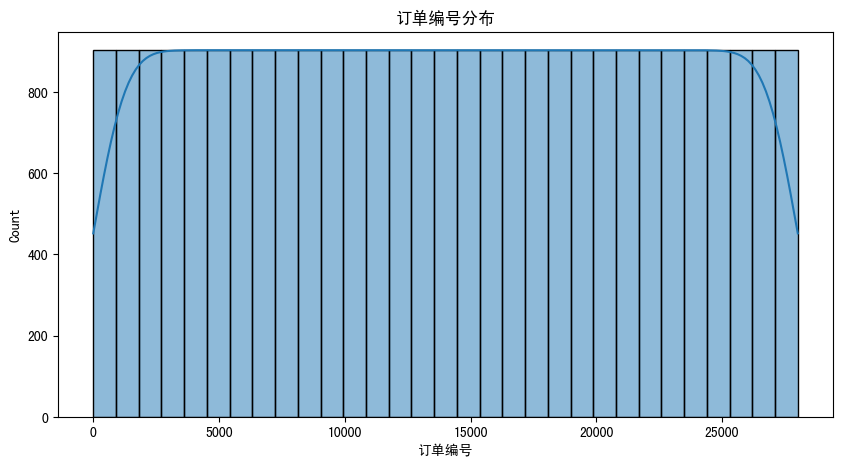

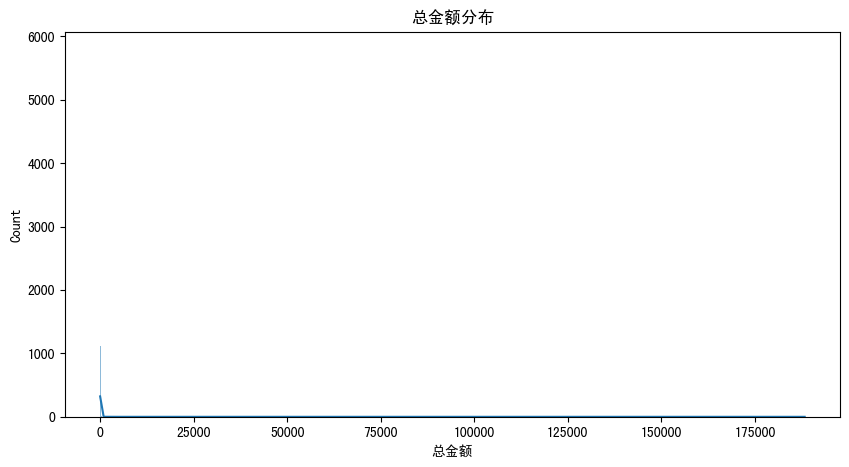

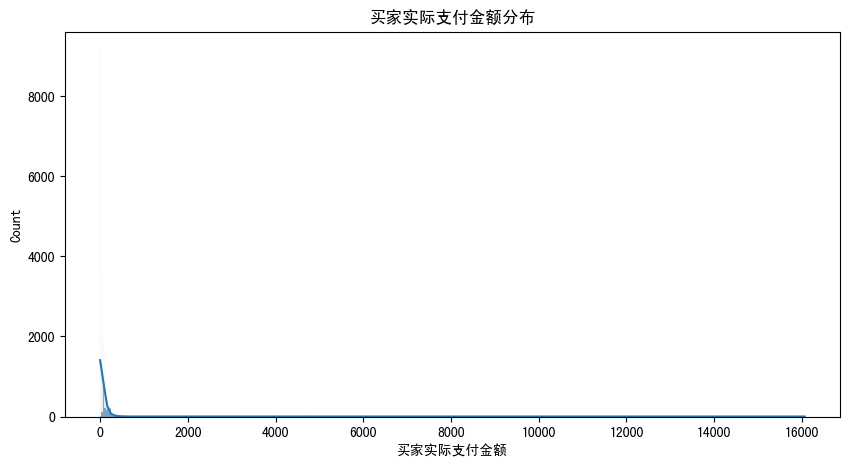

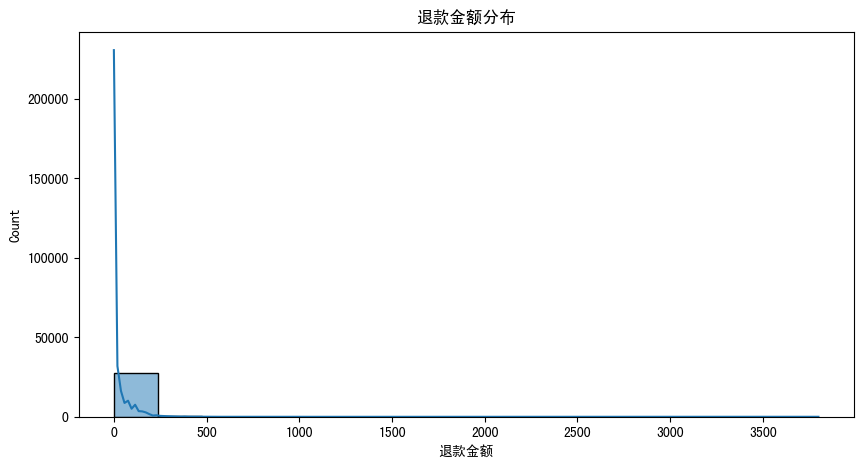

In [14]:
# 数值列分布可视化
numerical_cols = ['订单编号', '总金额', '买家实际支付金额', '退款金额']
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[col], kde=True)
    plt.title(f'{col}分布')
    plt.show()

In [15]:
# 缺失值分析
print('缺失值统计：')
print(data.isnull().sum())

缺失值统计：
订单编号           0
总金额            0
买家实际支付金额       0
收货地址           0
订单创建时间         0
订单付款时间      3923
退款金额           0
dtype: int64


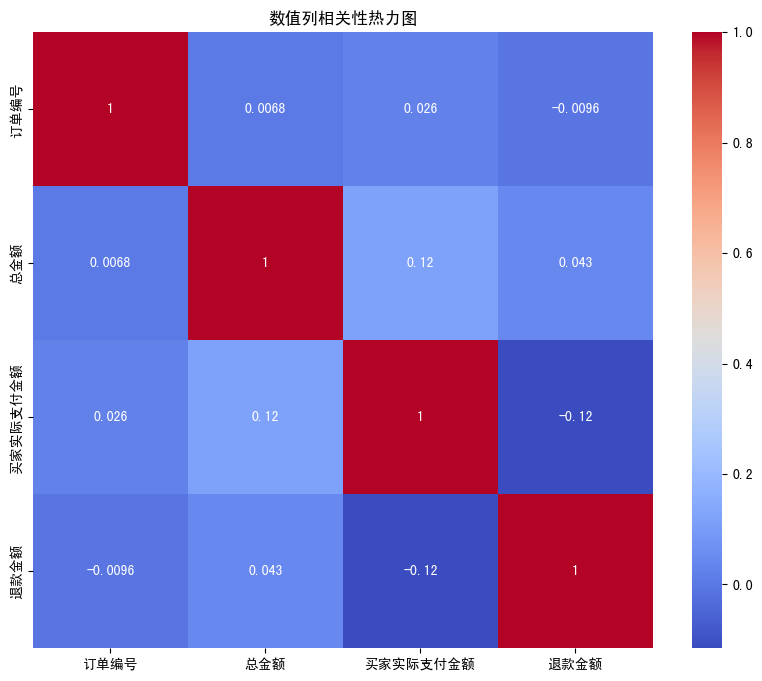

In [16]:
# 相关性分析
correlation = data[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('数值列相关性热力图')
plt.show()

## 分析与结论

1. **数据概览**：数据包含28010条记录，主要数值列包括订单编号、总金额、买家实际支付金额和退款金额。
2. **分布分析**：总金额和买家实际支付金额的分布右偏，可能存在异常值。
3. **缺失值**：数据中无缺失值。
4. **相关性**：总金额与买家实际支付金额呈现较强的正相关性。
5. **结论**：建议进一步分析异常值，并探索退款金额与其他变量的关系。